In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

definir el numero de registros

In [21]:
num_records = 8000

generar IDs únicos para cada registro

In [22]:
ids = range(1, num_records + 1)

establecer nombres aleatorios a los clientes de la lista ya definida

In [23]:
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Lucía', 'Carlos', 'Marta', 'Jorge', 'Elena']
nombres_clientes = random.choices(nombres, k=num_records)

generar edades aleatorias entre 18 y 80 años, establecer géneros de manera aleatoria, establecer categorías y montos de compra(entre 100 y 5000) de manera aleatoria

In [24]:
edades = np.random.randint(18, 70, num_records)
generos = random.choices(['Masculino', 'Femenino'], k=num_records)
categorias_producto = ['Electrónica', 'Ropa', 'Hogar', 'Juguetes', 'Libros', 'Deportes']
categorías_productos = random.choices(categorias_producto, k=num_records)
montos_compra = np.round(np.random.uniform(100, 5000, num_records), 2)

crear el dataframe

In [25]:
df = pd.DataFrame({
    'id_cliente': ids,
    'nombre_cliente': nombres_clientes,
    'edad': edades,
    'género': generos,
    'categoría_producto': categorías_productos,
    'monto_compra': montos_compra
})

In [28]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   id_cliente nombre_cliente  edad     género categoría_producto  monto_compra
0           1           Luis    55   Femenino             Libros       2911.18
1           2          Jorge    18  Masculino              Hogar       4507.70
2           3            Ana    30  Masculino        Electrónica        533.51
3           4          Marta    40  Masculino        Electrónica       2941.15
4           5           Luis    64  Masculino        Electrónica       1004.67


resumen estadístico de las variables categóricas

In [30]:
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())



Resumen estadístico de las variables numéricas:
       id_cliente         edad  monto_compra
count  8000.00000  8000.000000   8000.000000
mean   4000.50000    43.369500   2566.609220
std    2309.54541    15.029395   1418.756738
min       1.00000    18.000000    100.140000
25%    2000.75000    30.000000   1338.720000
50%    4000.50000    43.000000   2583.845000
75%    6000.25000    56.000000   3800.557500
max    8000.00000    69.000000   4999.480000


In [32]:
# Contar valores únicos de las variables categóricas
print("\nConteo de valores únicos en variables categóricas:")
print(df['nombre_cliente'].value_counts())
print(df['género'].value_counts())
print(df['categoría_producto'].value_counts())


Conteo de valores únicos en variables categóricas:
nombre_cliente
Ana       860
Pedro     846
Jorge     827
Marta     823
Carlos    818
Juan      810
Elena     776
Lucía     762
María     752
Luis      726
Name: count, dtype: int64
género
Femenino     4006
Masculino    3994
Name: count, dtype: int64
categoría_producto
Hogar          1358
Juguetes       1339
Deportes       1338
Electrónica    1325
Ropa           1321
Libros         1319
Name: count, dtype: int64


Visualización de datos

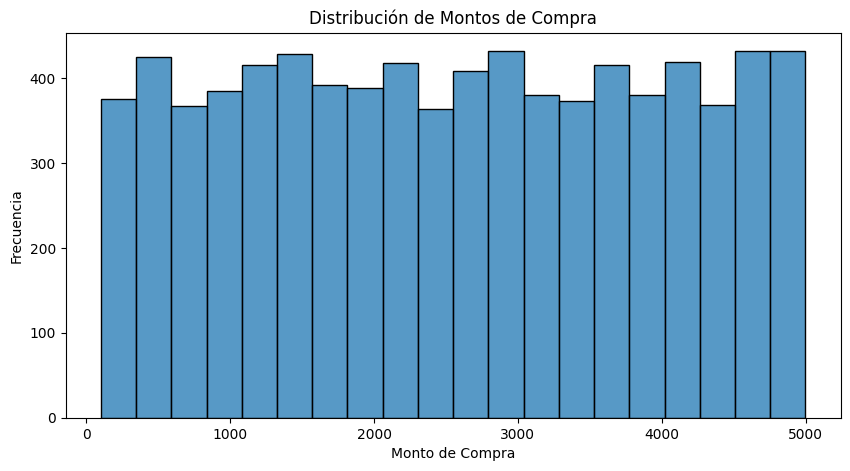

In [33]:
# Histograma de montos de compra
plt.figure(figsize=(10, 5))
sns.histplot(df['monto_compra'], bins=20)
plt.title('Distribución de Montos de Compra')
plt.xlabel('Monto de Compra')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-34-6f01843e9627>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categoría_producto', data=df, palette='pastel')


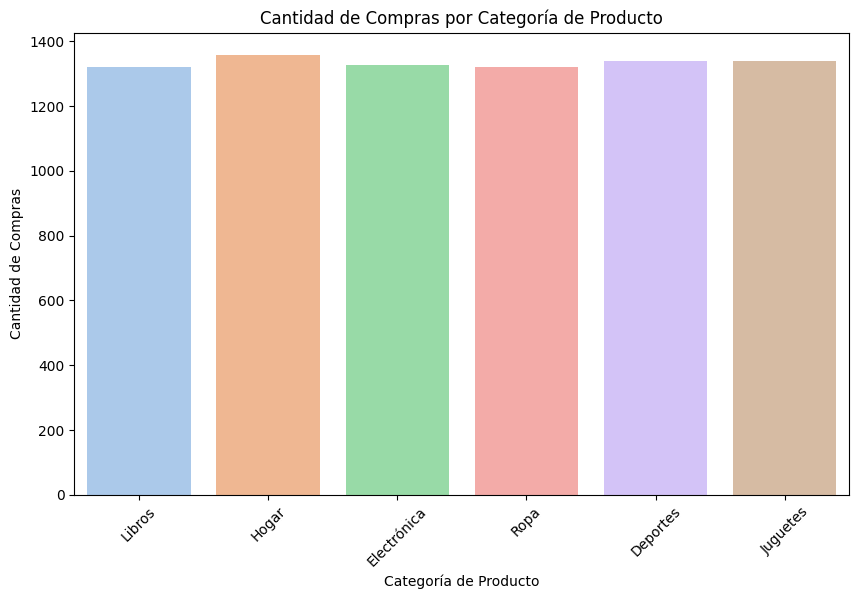

In [34]:
# Histograma de conteo por categoría de producto
plt.figure(figsize=(10, 6))
sns.countplot(x='categoría_producto', data=df, palette='pastel')
plt.title('Cantidad de Compras por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-eff31e586ddb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='género', y='monto_compra', data=df, palette='Set3')


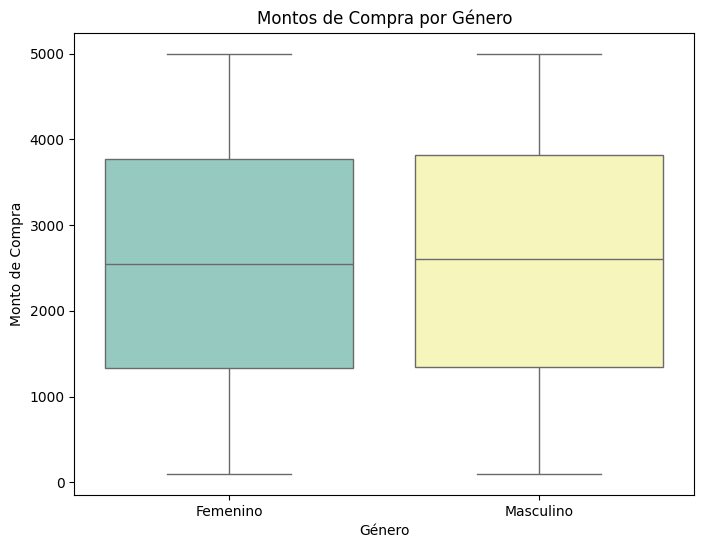

In [35]:
#montos de compra por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='género', y='monto_compra', data=df, palette='Set3')
plt.title('Montos de Compra por Género')
plt.xlabel('Género')
plt.ylabel('Monto de Compra')
plt.show()

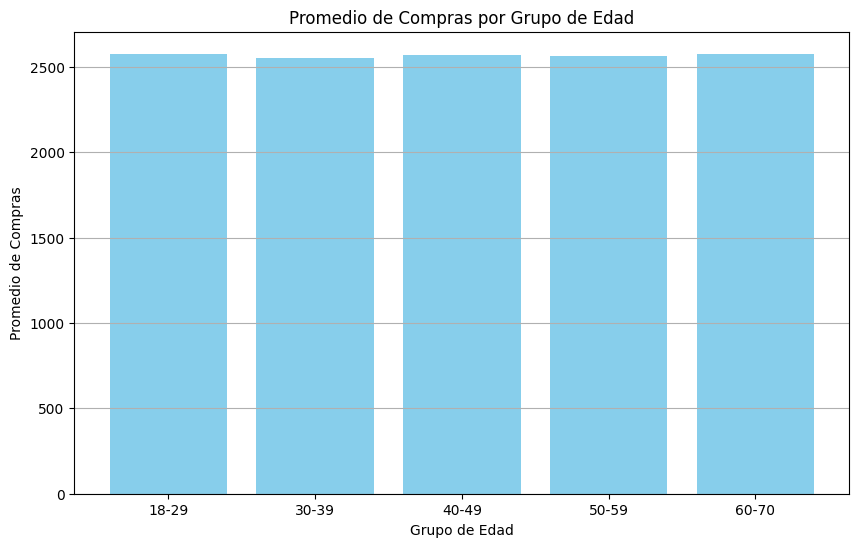

In [36]:
# Definir los rangos de edades para agrupar
bins = [18, 30, 40, 50, 60, 70]
# Etiquetas de los grupos de edades
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
# Agregar una columna de grupos de edad al DataFrame
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
# Calcular el promedio de compras por grupo de edad
promedio_compras_por_edad = df.groupby('grupo_edad')['monto_compra'].mean()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_compras_por_edad.index, promedio_compras_por_edad.values, color='skyblue')
# Títulos y etiquetas
plt.title('Promedio de Compras por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Promedio de Compras')
plt.grid(axis='y')  # Agregar rejilla horizontal

# Mostrar el gráfico
plt.show()